   Year  No of Accidents  Derailments  Collisions  Collisions at LC  \
0  2016                6            4           1                 0   
1  2017                3            2           0                 1   
2  2018                3            1           2                 0   
3  2019                5            4           0                 0   
4  2020                7            3           2                 2   

   Fire Accidents  
0               1  
1               0  
2               0  
3               1  
4               0  
Year                0
No of Accidents     0
Derailments         0
Collisions          0
Collisions at LC    0
Fire Accidents      0
dtype: int64
                 Generalized Linear Model Regression Results                  
Dep. Variable:        No of Accidents   No. Observations:                    6
Model:                            GLM   Df Residuals:                        2
Model Family:                 Poisson   Df Model:                      

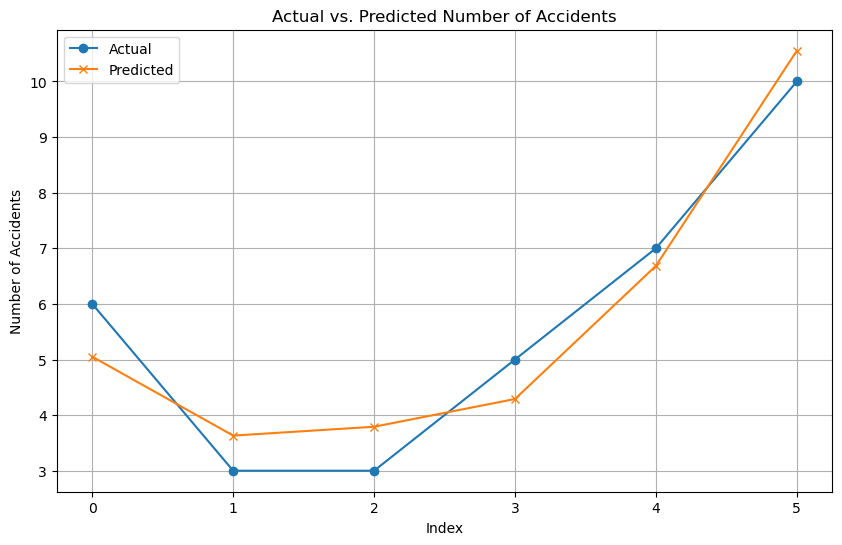

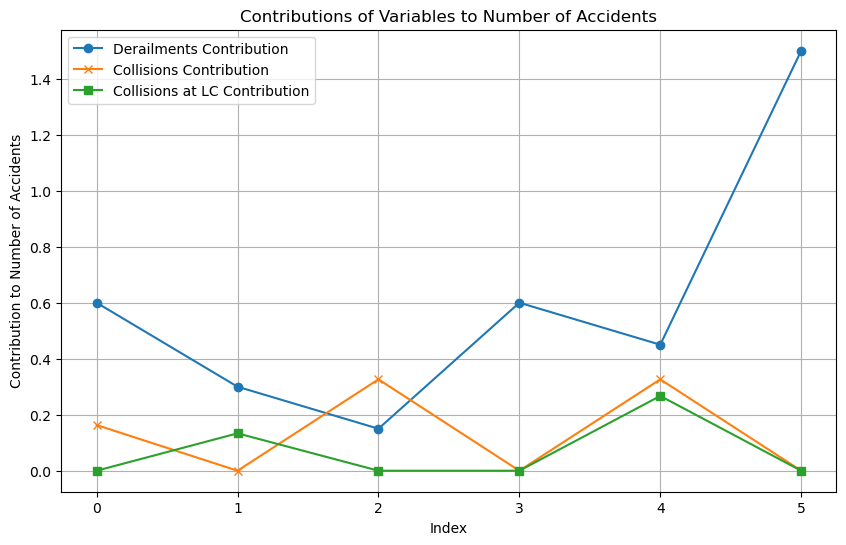

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
file_path = 'Quetta.xlsx'
sheet_name = 'accident types'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Inspect the first few rows of the dataframe
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Data cleaning (if necessary)
# For example, fill missing values
df = df.fillna(method='ffill')

# Define the dependent (response) and independent (predictor) variables
X = df[['Derailments', 'Collisions', 'Collisions at LC']]
y = df['No of Accidents']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Specify the GLM with a Poisson distribution and log link function
glm_poisson = sm.GLM(y, X, family=sm.families.Poisson(link=sm.families.links.log()))
glm_poisson_results = glm_poisson.fit()
summary = glm_poisson_results.summary()
print(summary)

# Deviance and AIC are directly available
print(f"Deviance: {glm_poisson_results.deviance}")
print(f"AIC: {glm_poisson_results.aic}")

# Calculate pseudo R-squared (McFadden's)
null_deviance = glm_poisson_results.null_deviance
pseudo_r_squared = 1 - (glm_poisson_results.deviance / null_deviance)
print(f"Pseudo R-squared (McFadden): {pseudo_r_squared}")

# Generate predicted values from the model
df['Predicted_No_of_Accidents'] = glm_poisson_results.predict(X)

# Plotting the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['No of Accidents'], label='Actual', marker='o')
plt.plot(df.index, df['Predicted_No_of_Accidents'], label='Predicted', marker='x')
plt.xlabel('Index')
plt.ylabel('Number of Accidents')
plt.title('Actual vs. Predicted Number of Accidents')
plt.legend()
plt.grid(True)
plt.savefig('actual_vs_predicted_accidents.png')
plt.show()

# Plotting contributions of each variable
plt.figure(figsize=(10, 6))

# Derailments
plt.plot(df.index, df['Derailments'] * glm_poisson_results.params['Derailments'], label='Derailments Contribution', marker='o')

# Collisions
plt.plot(df.index, df['Collisions'] * glm_poisson_results.params['Collisions'], label='Collisions Contribution', marker='x')

# Collisions at LC
plt.plot(df.index, df['Collisions at LC'] * glm_poisson_results.params['Collisions at LC'], label='Collisions at LC Contribution', marker='s')

plt.xlabel('Index')
plt.ylabel('Contribution to Number of Accidents')
plt.title('Contributions of Variables to Number of Accidents')
plt.legend()
plt.grid(True)
plt.savefig('contributions_to_accidents.png')
plt.show()


   Year  No of Accidents  Accidents at Track  Accidents in Station Limits
0  2016                6                   6                            0
1  2017                3                   2                            1
2  2018                3                   2                            1
3  2019                5                   4                            1
4  2020                7                   6                            1
Year                           0
No of Accidents                0
Accidents at Track             0
Accidents in Station Limits    0
dtype: int64
                 Generalized Linear Model Regression Results                  
Dep. Variable:        No of Accidents   No. Observations:                    6
Model:                            GLM   Df Residuals:                        3
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:         

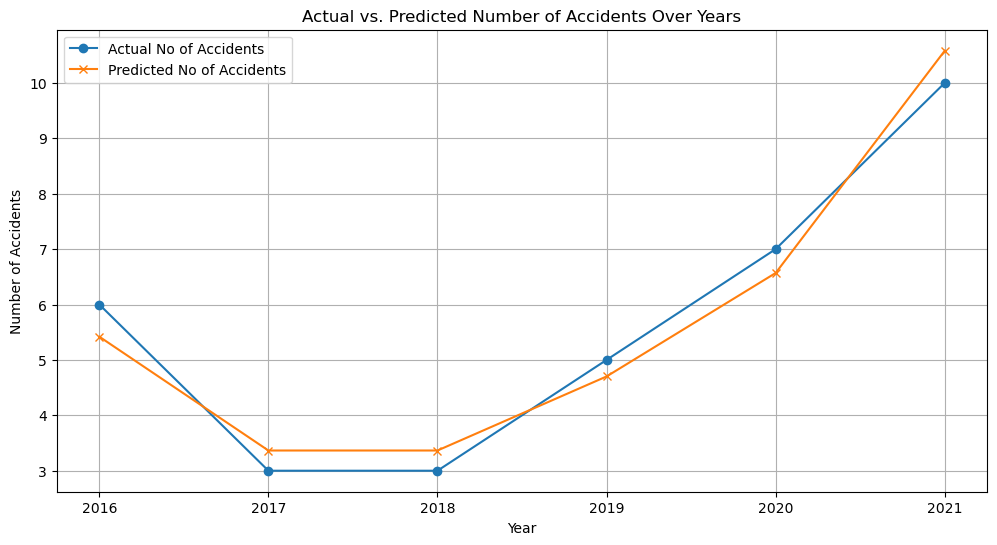

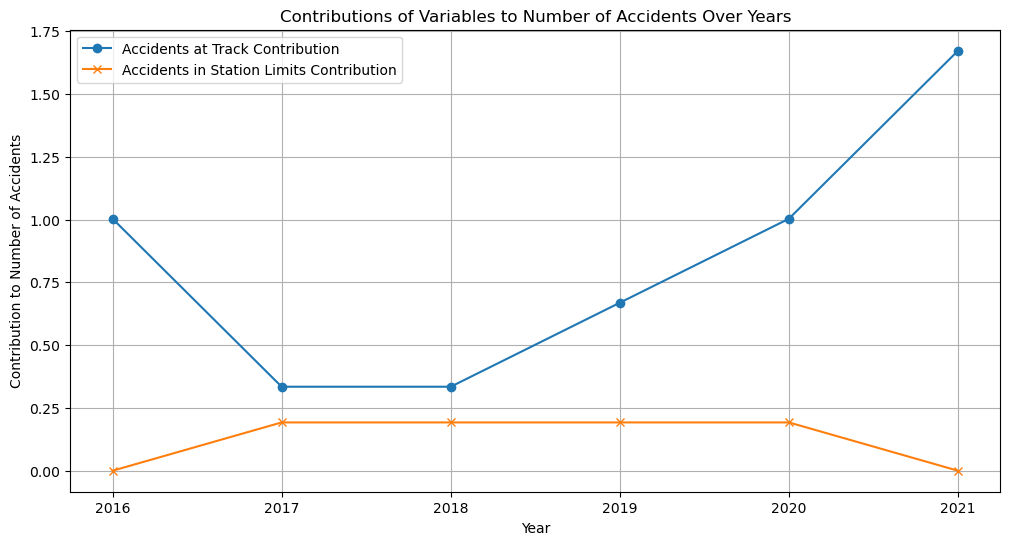

In [3]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
file_path = 'Quetta.xlsx'
sheet_name = 'Location of Accidents'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Inspect the first few rows of the dataframe
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Data cleaning (if necessary)
# For example, fill missing values
df = df.fillna(method='ffill')

# Define the dependent (response) and independent (predictor) variables
X = df[['Accidents at Track', 'Accidents in Station Limits']]
y = df['No of Accidents']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Specify the GLM with Poisson distribution and log link function
glm_poisson = sm.GLM(y, X, family=sm.families.Poisson(link=sm.families.links.log()))
glm_poisson_results = glm_poisson.fit()
summary = glm_poisson_results.summary()
print(summary)

# Deviance and AIC are directly available
print(f"Deviance: {glm_poisson_results.deviance}")
print(f"AIC: {glm_poisson_results.aic}")

# Calculate pseudo R-squared (McFadden's)
null_deviance = glm_poisson_results.null_deviance
pseudo_r_squared = 1 - (glm_poisson_results.deviance / null_deviance)
print(f"Pseudo R-squared (McFadden): {pseudo_r_squared}")

# Generate predicted values from the model
df['Predicted_No_of_Accidents'] = glm_poisson_results.predict(X)

# Plotting the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['No of Accidents'], label='Actual No of Accidents', marker='o')
plt.plot(df['Year'], df['Predicted_No_of_Accidents'], label='Predicted No of Accidents', marker='x')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Actual vs. Predicted Number of Accidents Over Years')
plt.legend()
plt.grid(True)
plt.savefig('actual_vs_predicted_accidents_location.png')
plt.show()

# Plotting contributions of each variable
plt.figure(figsize=(12, 6))

# Accidents at Track
plt.plot(df['Year'], df['Accidents at Track'] * glm_poisson_results.params['Accidents at Track'], label='Accidents at Track Contribution', marker='o')

# Accidents in Station Limits
plt.plot(df['Year'], df['Accidents in Station Limits'] * glm_poisson_results.params['Accidents in Station Limits'], label='Accidents in Station Limits Contribution', marker='x')

plt.xlabel('Year')
plt.ylabel('Contribution to Number of Accidents')
plt.title('Contributions of Variables to Number of Accidents Over Years')
plt.legend()
plt.grid(True)
plt.savefig('contributions_to_accidents_location.png')
plt.show()


        Section  Main_Line  Branch_Line
0      QTA- BLN          8            0
1  QTA- DLH-ZHN         21            0
2      CHM- QTA          0            5
3    BSL to RWP          0           14
                 Generalized Linear Model Regression Results                  
Dep. Variable:        No_of_Accidents   No. Observations:                    8
Model:                            GLM   Df Residuals:                        6
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -46.910
Date:                Sat, 03 Aug 2024   Deviance:                       77.021
Time:                        18:48:47   Pearson chi2:                     68.2
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2307
Covariance Type:            nonrobust                                         
          

<Figure size 1000x600 with 0 Axes>

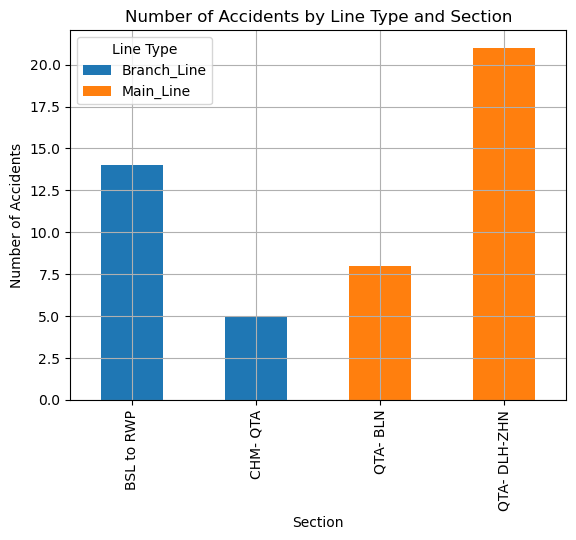

In [5]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import glm
import matplotlib.pyplot as plt

# Load the data
file_path = 'Quetta.xlsx'
sheet_name = 'type of line'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')

# Reshape the data to a long format
df_long = pd.melt(df, id_vars=['Section'], value_vars=['Main_Line', 'Branch_Line'], 
                   var_name='Line_Type', value_name='No_of_Accidents')
print(df)
# Convert 'Line_Type' to a categorical variable
df_long['Line_Type'] = df_long['Line_Type'].astype('category')

# Fit the GLM
model = glm('No_of_Accidents ~ Line_Type', 
            data=df_long,
            family=sm.families.Poisson()).fit()

# Print the summary of the model
print(model.summary())

# Print AIC and Deviance
print(f"Deviance: {model.deviance}")
print(f"AIC: {model.aic}")

# Plotting the actual values for each type of line
plt.figure(figsize=(10, 6))
df_pivot = df_long.pivot(index='Section', columns='Line_Type', values='No_of_Accidents')
df_pivot.plot(kind='bar', stacked=True)
plt.xlabel('Section')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Line Type and Section')
plt.legend(title='Line Type')
plt.grid(True)
plt.savefig('accidents_by_line_and_section.png')
plt.show()


In [8]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the data
file_path = 'Quetta.xlsx'
sheet_name = 'type of line'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Replace spaces in column names with underscores
df.columns = df.columns.str.replace(' ', '_')

# Define the dependent (response) variable and independent (predictor) variables
X = df[['Main_Line', 'Branch_Line']]
y = df['No_of_Accidents']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Specify the GLM with Poisson distribution and log link function
glm_poisson = sm.GLM(y, X, family=sm.families.Poisson(link=sm.families.links.log()))
glm_poisson_results = glm_poisson.fit()

# Print the summary of the model
print(glm_poisson_results.summary())

# Deviance and AIC are directly available
print(f"Deviance: {glm_poisson_results.deviance}")
print(f"AIC: {glm_poisson_results.aic}")

# Calculate pseudo R-squared (McFadden's)
null_deviance = glm_poisson_results.null_deviance
pseudo_r_squared = 1 - (glm_poisson_results.deviance / null_deviance)
print(f"Pseudo R-squared (McFadden): {pseudo_r_squared}")



                 Generalized Linear Model Regression Results                  
Dep. Variable:        No_of_Accidents   No. Observations:                    4
Model:                            GLM   Df Residuals:                        1
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8.5188
Date:                Sat, 03 Aug 2024   Deviance:                      0.23967
Time:                        18:57:14   Pearson chi2:                    0.238
No. Iterations:                     4   Pseudo R-squ. (CS):             0.9543
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.2902      0.452      2.854      